In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols = ['sentiment','id','date','query_string','user','text']

In [3]:
df = pd.read_csv("../data/twitter_corpse/training.1600000.processed.noemoticon.csv",header=None, names=cols,encoding = "ISO-8859-1")

In [4]:
df.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.groupby('sentiment').count()

,id,date,query_string,user,text
sentiment,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


In [6]:
df.describe()

,sentiment,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
sentiment       1600000 non-null int64
id              1600000 non-null int64
date            1600000 non-null object
query_string    1600000 non-null object
user            1600000 non-null object
text            1600000 non-null object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [8]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [9]:
df.drop(['id','date','query_string','user'],axis=1,inplace=True)

In [10]:
df.head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df[df.sentiment == 0].head(5)

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
df[df.sentiment == 4].head(5)

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [13]:
df['senetry_check']=[len(t) for t in df.text]

In [14]:
df.head()

,sentiment,text,senetry_check
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [15]:
from pprint import pprint

In [16]:
data_dist = {
    'sentiment': {
        'type': df.sentiment.dtype,
        'discription': 'sentiment class: 0=nevative,1=positive'
    },
    'text': {
        'type': df.text.dtype,
        'discription': 'tweet text'
    },
    'senetry_check': {
        'type': df.senetry_check.dtype,
        'discription': 'tweet length'
    },
    'data_shape':df.shape
}

In [17]:
pprint(data_dist)

{'data_shape': (1600000, 3),
 'senetry_check': {'discription': 'tweet length', 'type': dtype('int64')},
 'sentiment': {'discription': 'sentiment class: 0=nevative,1=positive',
               'type': dtype('int64')},
 'text': {'discription': 'tweet text', 'type': dtype('O')}}


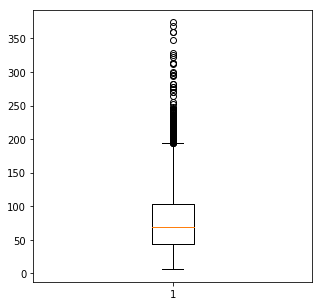

In [18]:
fig,ax =plt.subplots(figsize=(5,5))
plt.boxplot(df.senetry_check)
plt.show()

In [19]:
df[df.senetry_check >= 140].head(10)

,sentiment,text,senetry_check
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144
464,0,"My bathtub drain is fired: it haz 1 job 2 do, ...",146
492,0,"pears &amp; Brie, bottle of Cabernet, and &quo...",150
535,0,Why Kutner? I mean I knew something was going ...,140
747,0,Have an invite for &quot;Healthy Dining&quot; ...,141
957,0,Damnit I was really digging this season of Rea...,141


In [20]:
df.text[279]

"Whinging. My client&amp;boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&amp;reviewed correctly. "

In [21]:
from bs4 import BeautifulSoup

In [22]:
example = BeautifulSoup(df.text[279],'lxml')

In [23]:
example.get_text()

"Whinging. My client&boss don't understand English well. Rewrote some text unreadable. It's written by v. good writer&reviewed correctly. "

In [24]:
df.text[343]

'@TheLeagueSF Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [25]:
import re
re.sub(r'@[A-Za-z0-9]+','',df.text[343])


' Not Fun &amp; Furious? The new mantra for the Bay 2 Breakers? It was getting 2 rambunctious;the city overreacted &amp; clamped down '

In [26]:
df.text[0]


"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [27]:
df.head()

,sentiment,text,senetry_check
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [28]:
df.rename({'senetry_check':'len'},axis=1,inplace=True)

In [29]:
df.head(5)

,sentiment,text,len
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


In [30]:
re.sub(r'https?://[a-zA-Z0-9./]+','',df.text[0])

"@switchfoot  - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [31]:
df.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [32]:
df.text[226]

'Tuesdayï¿½ll start with reflection ï¿½n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [33]:
df.text[226].replace('ï¿½','?')

'Tuesday?ll start with reflection ?n then a lecture in Stress reducing techniques. That sure might become very useful for us accompaniers '

In [34]:
df.text[175]

"@machineplay I'm so sorry you're having to go through this. Again.  #therapyfail"

In [35]:
re.sub('[^a-zA-Z]',' ',df.text[175])

' machineplay I m so sorry you re having to go through this  Again    therapyfail'

In [40]:
from nltk.tokenize  import  WordPunctTokenizer


In [41]:
tok = WordPunctTokenizer()

In [42]:
part1 = r'@[a-zA-Z0-9]+'

In [43]:
part2 = r'https?://[a-zA-Z0-9./]+'

In [44]:
combined_part = part1+'|'+part2

In [45]:
combined_part

'@[a-zA-Z0-9]+|https?://[a-zA-Z0-9./]+'

In [47]:
combined_part = r'|'.join((part1,part2))

In [48]:
combined_part

'@[a-zA-Z0-9]+|https?://[a-zA-Z0-9./]+'

In [53]:
def twitter_clean(text):
    soup =BeautifulSoup(text,'lxml')
    souped =soup.get_text()
    striped = re.sub(combined_part,'',souped)
    try:
        clean = striped
    except:
        clean = striped
    
    letters_only = re.sub(r'[^a-zA-Z]',' ',clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    return ' '.join(words).strip()

testing =df.text[:10]
test_resullt =[]
for t in testing:
    test_resullt.append(twitter_clean(t))
test_resullt
    
    

['awww that s a bummer you shoulda got david carr of third day to do it d',
 'is upset that he can t update his facebook by texting it and might cry as a result school today also blah',
 'i dived many times for the ball managed to save the rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 'no it s not behaving at all i m mad why am i here because i can t see you all over there',
 'not the whole crew',
 'need a hug',
 'hey long time no see yes rains a bit only a bit lol i m fine thanks how s you',
 'k nope they didn t have it',
 'que me muera']

In [55]:
!git add 


On branch master
Your branch is up-to-date with 'origin/master'.
Changes not staged for commit:
	modified:   data_analysis.ipynb

no changes added to commit
